In [1]:
import torch
import numpy as np

In [2]:
x = torch.randn(3, requires_grad = True)
print(x)

tensor([ 0.2801, -0.8547, -0.3221], requires_grad=True)


In [3]:
y = x + 2
print(y)

tensor([2.2801, 1.1453, 1.6779], grad_fn=<AddBackward0>)


In [4]:
z = y + 3
z = z.mean()
print(z)

tensor(4.7011, grad_fn=<MeanBackward0>)


In [5]:
z.backward()  #dz / dx  --> simply to calculate the gradients by calling backward function

In [6]:
print(x.grad)

tensor([0.3333, 0.3333, 0.3333])


<h3> Example of a training loop </h3>

In [7]:
weights = torch.ones(4, requires_grad = True)

for epoch in range(3):
    model_output = (weights * 3).sum()
    
    model_output.backward()     #calculate gradients with respect to the weights.
    
    print(weights.grad)
    
    weights.grad.zero_()        #prevent gradients from being tracked. 

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


<h3> Example on 1 forward and backward propagation </h3>

In [8]:
weight = torch.tensor(1.0, requires_grad = True)
x = torch.tensor(1.0)     #fixed
y = torch.tensor(2.0)     #fixed

y_hat = weight * x 

loss = (y_hat - y) ** 2       #loss function

loss.backward()          #gradient of the loss function with respect to weight
print(weight.grad)

tensor(-2.)


<h3> From Scratch using Numpy - Linear Regression </h3>

In [22]:
import numpy as np

X = np.array([1,2,3,4], dtype = np.float32)
Y = np.array([2,4,6,8], dtype = np.float32)

w = 0.0


#model prediction
def forward(x):
    return w * x


#loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()


#gradient
#MSE = 1/N * (w*x - y)**2
#dJ/dw = 1/N 2x (w*x - y)

def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients
    dw = gradient(X,Y,y_pred)
    
    #update weights
    w -= learning_rate * dw
    
    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050331
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
epoch 11: w = 2.000, loss = 0.00000033
epoch 12: w = 2.000, loss = 0.00000005
epoch 13: w = 2.000, loss = 0.00000001
epoch 14: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
epoch 16: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 18: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
epoch 20: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


<h3> Using Pytorch </h3>

In [27]:
import torch

X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([2,4,6,8], dtype = torch.float32)

w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

#model prediction
def forward(x):
    return w * x


#loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()


print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    #update weights
    with torch.no_grad():
        w -= learning_rate * w.grad
        
    # zero gradients
    w.grad.zero_()
    
    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5) = {forward(5):.3f}')
print('\nNot as good as numpy because the backward propagation is not exact like the numpy')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 3: w = 0.772, loss = 15.66018772
epoch 5: w = 1.113, loss = 8.17471695
epoch 7: w = 1.359, loss = 4.26725292
epoch 9: w = 1.537, loss = 2.22753215
epoch 11: w = 1.665, loss = 1.16278565
epoch 13: w = 1.758, loss = 0.60698116
epoch 15: w = 1.825, loss = 0.31684780
epoch 17: w = 1.874, loss = 0.16539653
epoch 19: w = 1.909, loss = 0.08633806
epoch 21: w = 1.934, loss = 0.04506890
epoch 23: w = 1.952, loss = 0.02352631
epoch 25: w = 1.966, loss = 0.01228084
epoch 27: w = 1.975, loss = 0.00641066
epoch 29: w = 1.982, loss = 0.00334642
epoch 31: w = 1.987, loss = 0.00174685
epoch 33: w = 1.991, loss = 0.00091188
epoch 35: w = 1.993, loss = 0.00047601
epoch 37: w = 1.995, loss = 0.00024848
epoch 39: w = 1.996, loss = 0.00012971
epoch 41: w = 1.997, loss = 0.00006770
epoch 43: w = 1.998, loss = 0.00003534
epoch 45: w = 1.999, loss = 0.00001845
epoch 47: w = 1.999, loss = 0.00000963
epoch 49: w = 1.999, loss 

### Training Pipeline: Model, Loss and Optimizer 

In [47]:
# 1) Design model (input size, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#    - forward pass: compute prediction
#    - backward pass: gradients
#    - update weights


#Basically with PyTorch, we only need to know which 
#Loss and Optimizer we need to use.

import torch
import torch.nn as nn

X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32)

X_test = torch.tensor([5], dtype = torch.float32)

#don't need weights and forward fn anymore since PyTorch will help. 
#need to initialize a 2d array where the number of rows is the number of samples

#([4,1])
n_samples, n_features = X.shape  

input_size = n_features
output_size = n_features

# model = nn.Linear(input_size, output_size)       # 1 layer

#Design Model --------------------------------------------------------------

class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super().__init__()
        #define layers
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self,x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)    

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')


#Construct Loss and Optimizer -----------------------------------------------

loss = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


#Training Loop --------------------------------------------------------------

n_iters = 100

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() # dl/dw
    
    #update weights
    optimizer.step()
        
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')
print('\nNot as good as numpy because the backward propagation is not exact like the numpy')

Prediction before training: f(5) = 4.893
epoch 1: w = 0.920, loss = 6.13462734
epoch 11: w = 1.488, loss = 0.39158028
epoch 21: w = 1.589, loss = 0.22944006
epoch 31: w = 1.615, loss = 0.21248014
epoch 41: w = 1.628, loss = 0.20001943
epoch 51: w = 1.640, loss = 0.18837476
epoch 61: w = 1.650, loss = 0.17741027
epoch 71: w = 1.661, loss = 0.16708417
epoch 81: w = 1.671, loss = 0.15735891
epoch 91: w = 1.681, loss = 0.14819986
Prediction after training: f(5) = 9.360

Not as good as numpy because the backward propagation is not exact like the numpy


### Linear Regression with PyTorch

epoch: 10, loss = 4441.8330
epoch: 20, loss = 3312.5134
epoch: 30, loss = 2495.5005
epoch: 40, loss = 1903.7920
epoch: 50, loss = 1474.8286
epoch: 60, loss = 1163.5613
epoch: 70, loss = 937.5048
epoch: 80, loss = 773.2037
epoch: 90, loss = 653.7011
epoch: 100, loss = 566.7242


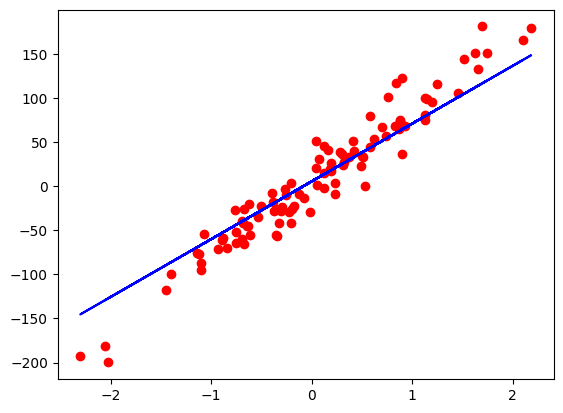

In [55]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#0) prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) #reshape tensor

n_samples, n_features = X.shape  #([100,1])

#1) model
input_size = n_features
output_size = 1        #each sample that we put in, our model gets 1 output.
model = nn.Linear(input_size, output_size)

#2) loss and optimizer

criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    #backward pass
    loss.backward()
    
    #update
    optimizer.step()
    
    #empty gradients because whenever we call the backward, it will sum up the gradients into the dot product attribute
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')
    
#plot
predicted = model(X).detach().numpy() #detach to remove the require gradient in Tensor so that we can convert into numpy.
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

### Logistic Regression using PyTorch

In [65]:
# 1) Design model (input size, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#    - forward pass: compute prediction
#    - backward pass: gradients
#    - update weights

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets   # to load binary classification dataset.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#0) prepare data
bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target

n_samples, n_features = X.shape     #([569, 30])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

#scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)   #put each value in 1 row, with total only 1 column.
y_test = y_test.view(y_test.shape[0], 1)   


#1) model
# f = wx + b, sigmoid at the end

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.linear = nn.Linear(n_input_features, 1)   #first we apply the linear layer
    
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))    #then, we apply the sigmoid function
        return y_predicted

model = LogisticRegression(n_features)


#2) loss and optimizer
criterion = nn.BCELoss() #binary cross entrophy loss
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


#3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    
    #forward pass and loss calculation
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    #backward pass
    loss.backward()
    
    #updates
    optimizer.step()
    
    #zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
        
with torch.no_grad():      #Evaluation should not be part of our computational graph where we want to track the history, so we remove the gradient tracking.
    y_predicted = model(X_test)
    y_predicted_classes = y_predicted.round() #those above 0.5 turn to 1. somemore, if we don't use the no_grad above, we cannot do this, since got require_grad.
    acc = y_predicted_classes.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

epoch: 10, loss = 0.4738
epoch: 20, loss = 0.4022
epoch: 30, loss = 0.3542
epoch: 40, loss = 0.3198
epoch: 50, loss = 0.2940
epoch: 60, loss = 0.2738
epoch: 70, loss = 0.2575
epoch: 80, loss = 0.2440
epoch: 90, loss = 0.2327
epoch: 100, loss = 0.2229
accuracy = 0.8947


In [ ]:
_